In [1]:
%matplotlib notebook
import numpy as np
import glob, os
import g0_init_cfg as ic
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from astropy.io import fits

# ----- Importing IRAF from the root directory ----- #
current_dir = os.getcwd()
os.chdir(ic.dir_iraf)

from pyraf import iraf
from pyraf.iraf import gemini, gmos

os.chdir(current_dir)
iraf.chdir(current_dir)

uparm parameter list `/home/jlee/anaconda3/envs/geminiconda/iraf/noao/imred/ccdred/ccdtest/ccdtest.par' inconsistent with default parameters for IrafPkg `ccdtest'


#  Finding the gaps with ``gffindblocks``

In [2]:
for d in ic.dir_wav:
    dir_sci = sorted(glob.glob(d+"/*"))

    for j in np.arange(len(dir_sci)):

        # Moving each science directory
        name_sci = dir_sci[j].split("/")[-1]
        print("Moving path for "+name_sci+"...")
        os.chdir(current_dir+"/"+dir_sci[j])
        iraf.chdir(current_dir+"/"+dir_sci[j])

        # FLAT
        flat = np.loadtxt(ic.lst_flat, dtype=str)
        flat0 = flat.item(0)
        
        # Find the gaps
        iraf.sections('blkmask_@'+ic.lst_flat, Stdout='blkmask.lis')
        iraf.delete('@blkmask.lis', verify='no')
        iraf.delete('blkmask.lis', verify='no')
        iraf.gffindblocks('rg'+flat0, 'erg'+flat0, 'blkmask_'+flat0)
        print('\n')
        
        # Coming back to current path
        os.chdir(current_dir)
        iraf.chdir(current_dir)  

Moving path for N20210621S0149...
1 512 72 76
1 512 343 350
1 512 615 620
1 512 886 891
1 512 1156 1159
1 512 1426 1430
1 512 1695 1700
1 512 1965 1969
1 512 2235 2241
1 512 2505 2510
1 512 2776 2780
1 512 3046 3049
1 512 3315 3321
1 512 3586 3590
1 512 3858 3861
1 512 4129 4133
16 gaps found


Moving path for N20210621S0150...
1 512 72 76
1 512 345 347
1 512 617 619
1 512 887 889
1 512 1157 1159
1 512 1427 1429
1 512 1697 1699
1 512 1967 1969
1 512 2236 2238
1 512 2508 2510
1 512 2777 2779
1 512 3046 3048
1 512 3317 3319
1 512 3589 3591
1 512 3859 3861
1 512 4128 4132
16 gaps found


Moving path for N20210621S0152...
1 512 72 76
1 512 345 347
1 512 617 619
1 512 887 889
1 512 1157 1159
1 512 1427 1429
1 512 1697 1699
1 512 1967 1969
1 512 2236 2238
1 512 2508 2510
1 512 2777 2779
1 512 3046 3048
1 512 3317 3319
1 512 3589 3591
1 512 3859 3861
1 512 4128 4132
16 gaps found


Moving path for N20210621S0153...
1 512 72 76
1 512 345 347
1 512 616 618
1 512 887 889
1 512 1157 1159
1 512 14

Moving path for N20210621S0149...


<IPython.core.display.Javascript object>


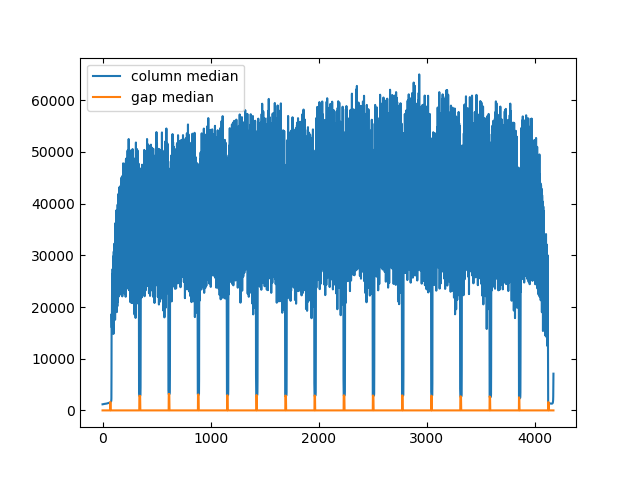

Moving path for N20210621S0150...


<IPython.core.display.Javascript object>


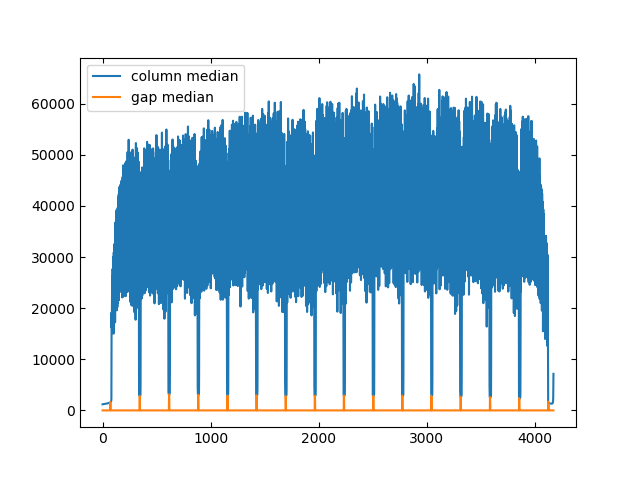

Moving path for N20210621S0152...


<IPython.core.display.Javascript object>


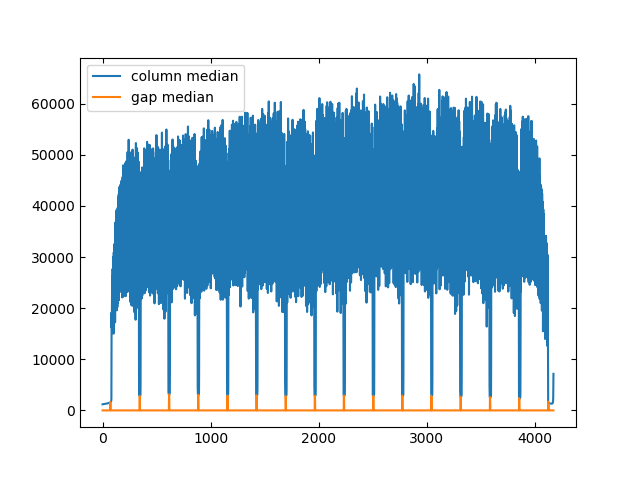

Moving path for N20210621S0153...


<IPython.core.display.Javascript object>


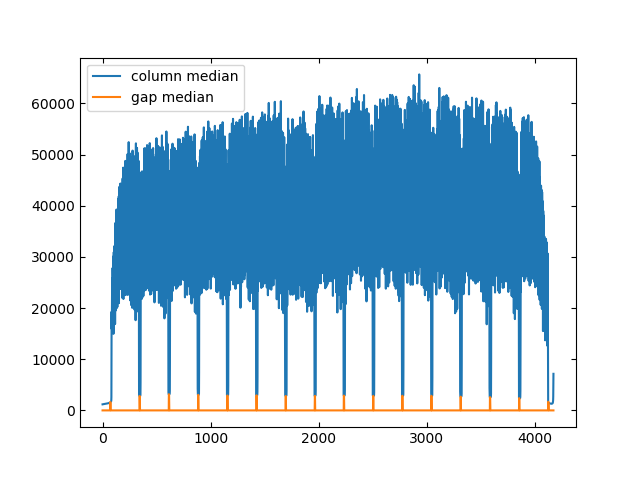

Moving path for N20210701S0076...


<IPython.core.display.Javascript object>


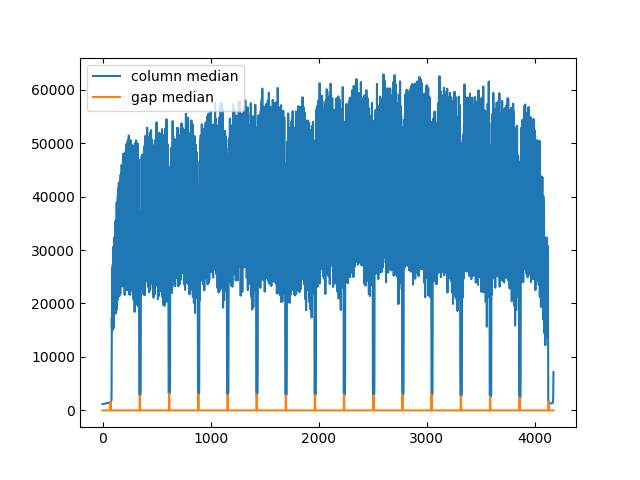

Moving path for N20210701S0077...


<IPython.core.display.Javascript object>


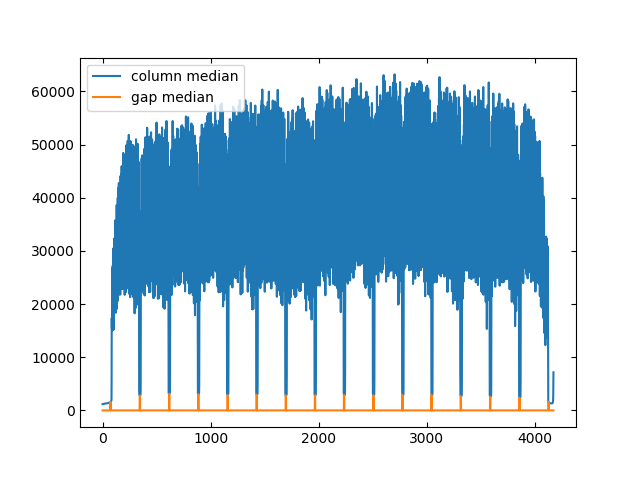

Moving path for N20210701S0079...


<IPython.core.display.Javascript object>


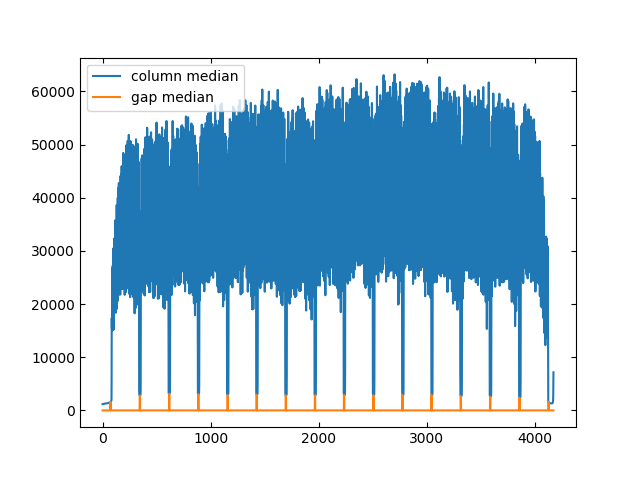

Moving path for N20210701S0080...


<IPython.core.display.Javascript object>


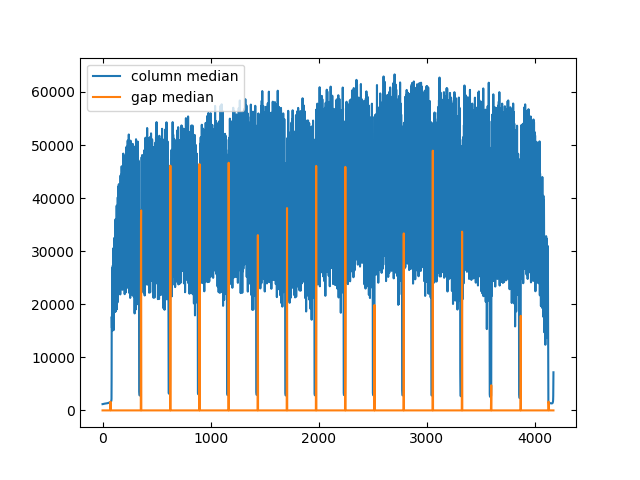

Moving path for N20210621S0142...


<IPython.core.display.Javascript object>


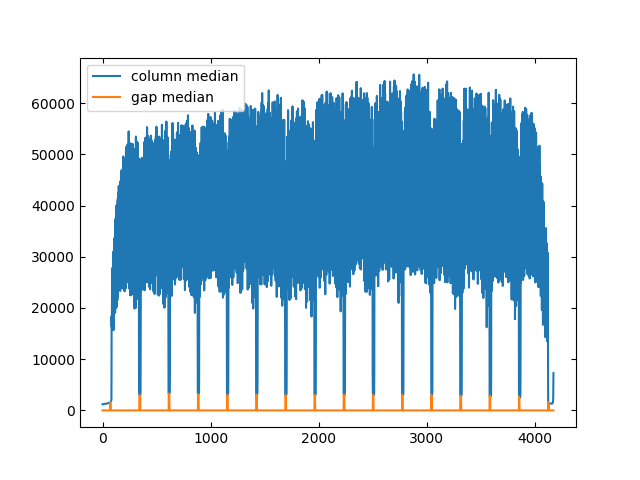

Moving path for N20210621S0143...


<IPython.core.display.Javascript object>


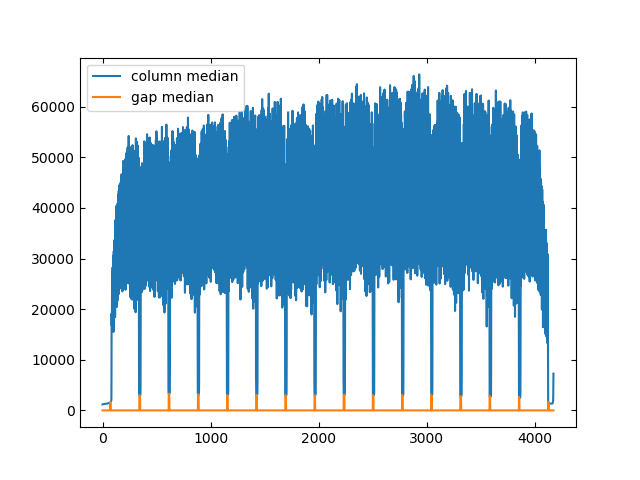

Moving path for N20210621S0145...


<IPython.core.display.Javascript object>


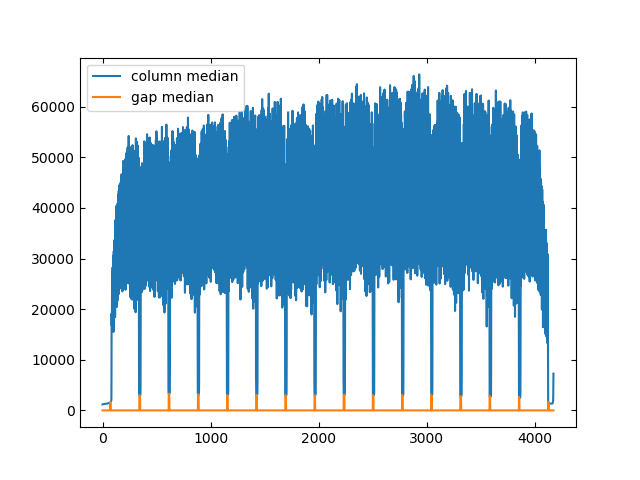

Moving path for N20210621S0146...


<IPython.core.display.Javascript object>


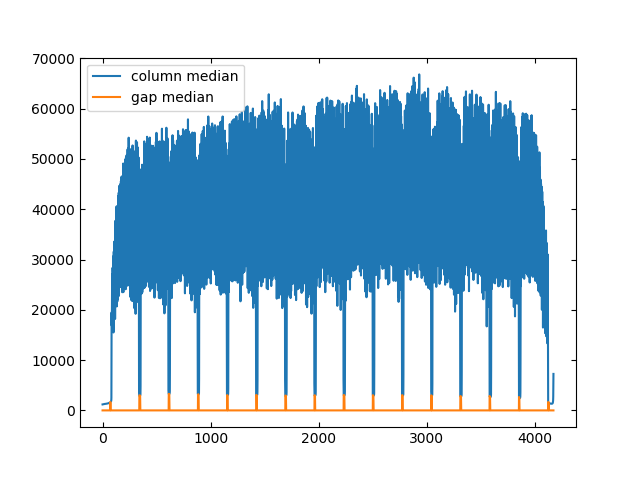

Moving path for N20210701S0069...


<IPython.core.display.Javascript object>


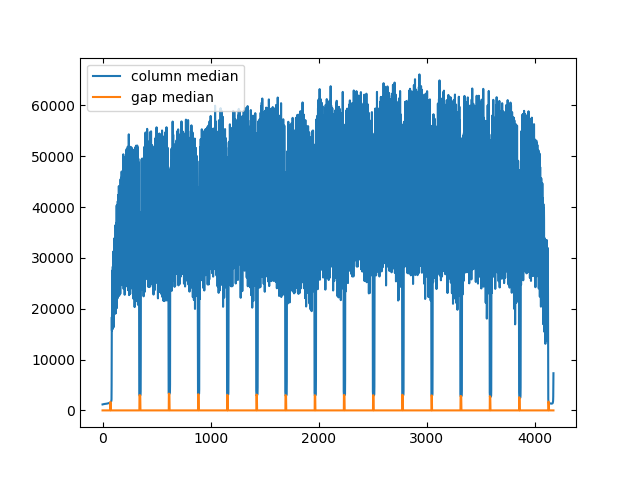

Moving path for N20210701S0070...


<IPython.core.display.Javascript object>


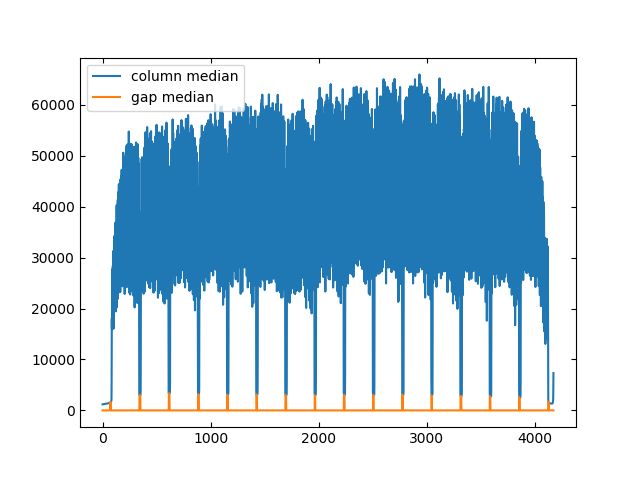

Moving path for N20210701S0072...


<IPython.core.display.Javascript object>


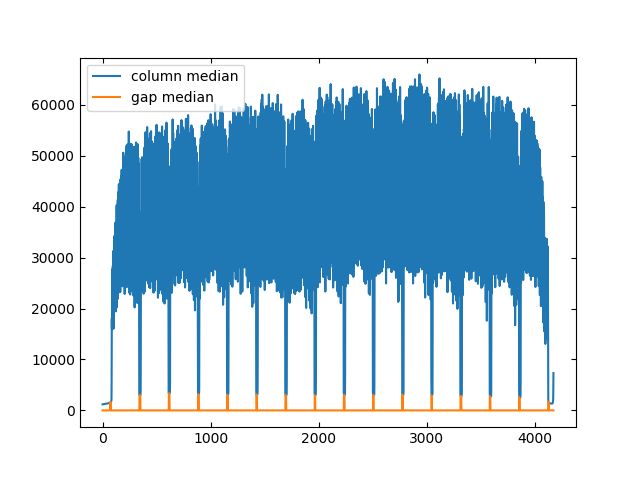

Moving path for N20210701S0073...


<IPython.core.display.Javascript object>


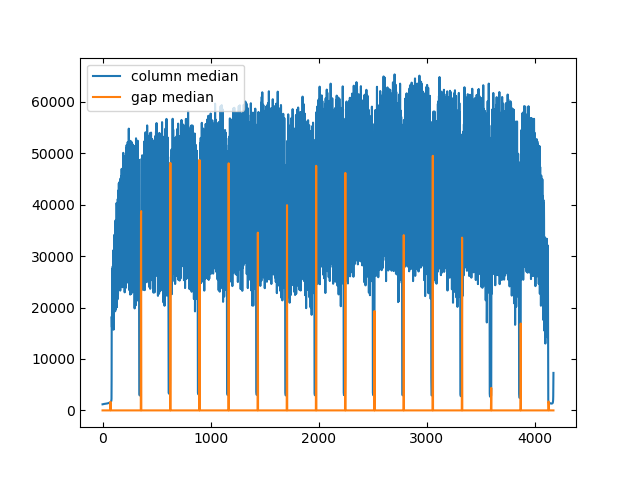

In [3]:
for d in ic.dir_wav:
    dir_sci = sorted(glob.glob(d+"/*"))

    for j in np.arange(len(dir_sci)):

        # Moving each science directory
        name_sci = dir_sci[j].split("/")[-1]
        print("Moving path for "+name_sci+"...")
        os.chdir(current_dir+"/"+dir_sci[j])
        iraf.chdir(current_dir+"/"+dir_sci[j])
        
        # FLAT
        flat = np.loadtxt(ic.lst_flat, dtype=str)
        flat0 = flat.item(0)
        
        # Reading FITS images
        flat_name = 'rg'+flat0+'.fits'
        rg = fits.getdata(flat_name, ext=1)

        # Reading blkmask file made by IRAF/Gemini package
        msk_ascii = np.genfromtxt('blkmask_'+flat0, dtype=int)

        # Mask flagging (int_msk : from IRAF/Gemini)
        int_msk = rg*0
        for i in np.arange(msk_ascii.shape[0]):
            reg = (msk_ascii[i]-1).tolist()
            int_msk[reg[2]-1:reg[3], :] = 1
        bin_msk = (int_msk == 1)
        
        # Checkplots
        fig, ax = plt.subplots()
        ax.plot(np.median(rg, axis=1), label='column median')
        ax.plot(np.median(int_msk*rg, axis=1), zorder=+10, label='gap median')
        plt.legend()

        # Coming back to current path
        os.chdir(current_dir)
        iraf.chdir(current_dir)

In [4]:
for d in ic.dir_wav:
    dir_sci = sorted(glob.glob(d+"/*"))

    for j in np.arange(len(dir_sci)):

        # Moving each science directory
        name_sci = dir_sci[j].split("/")[-1]
        print("Moving path for "+name_sci+"...")
        os.chdir(current_dir+"/"+dir_sci[j])
        iraf.chdir(current_dir+"/"+dir_sci[j])

        # FLAT
        flat = np.loadtxt(ic.lst_flat, dtype=str)
        flat0 = flat.item(0)
        
        # Checking gaps
        if ((name_sci == 'N20210701S0080') | \
            (name_sci == 'N20210701S0073')):
            all_gaps_are_ok = False
        else:
            all_gaps_are_ok = True  # If False, new gap mask file should be written below.

        if all_gaps_are_ok:
            blkmsk_name = 'blkmask_'+flat0
        else:
            blkmsk_name = 'newblkmask_'+flat0

        with open("blkmask_name.txt", "w") as f:
            f.write(blkmsk_name+"\n")

        # Coming back to current path
        os.chdir(current_dir)
        iraf.chdir(current_dir)

Moving path for N20210621S0149...
Moving path for N20210621S0150...
Moving path for N20210621S0152...
Moving path for N20210621S0153...
Moving path for N20210701S0076...
Moving path for N20210701S0077...
Moving path for N20210701S0079...
Moving path for N20210701S0080...
Moving path for N20210621S0142...
Moving path for N20210621S0143...
Moving path for N20210621S0145...
Moving path for N20210621S0146...
Moving path for N20210701S0069...
Moving path for N20210701S0070...
Moving path for N20210701S0072...
Moving path for N20210701S0073...


# Finding the Gaps Manually

* This process should be done only if the above iraf tasks are not satisfactory.

In [5]:
name_sci_prob = ['N20210701S0080', 'N20210701S0073']    # by the above figure
gap_upper_limit = 9000    # by the above figure

Moving path for N20210701S0080...
[[  73   77]
 [ 344  348]
 [ 617  621]
 [ 888  892]
 [1157 1161]
 [1428 1432]
 [1695 1699]
 [1967 1971]
 [2238 2242]
 [2507 2511]
 [2778 2782]
 [3048 3052]
 [3317 3321]
 [3589 3593]
 [3862 3866]
 [4133 4137]]


<IPython.core.display.Javascript object>


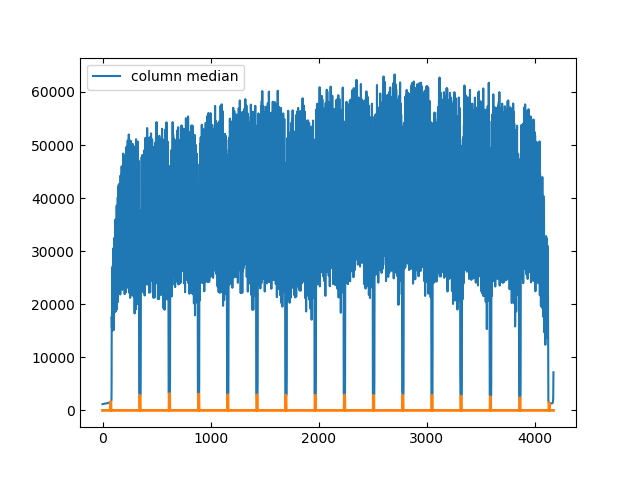

Moving path for N20210701S0073...
[[  73   77]
 [ 344  348]
 [ 615  619]
 [ 885  889]
 [1157 1161]
 [1426 1430]
 [1695 1699]
 [1966 1970]
 [2236 2240]
 [2508 2512]
 [2779 2783]
 [3049 3053]
 [3317 3321]
 [3590 3594]
 [3862 3866]
 [4133 4137]]


<IPython.core.display.Javascript object>


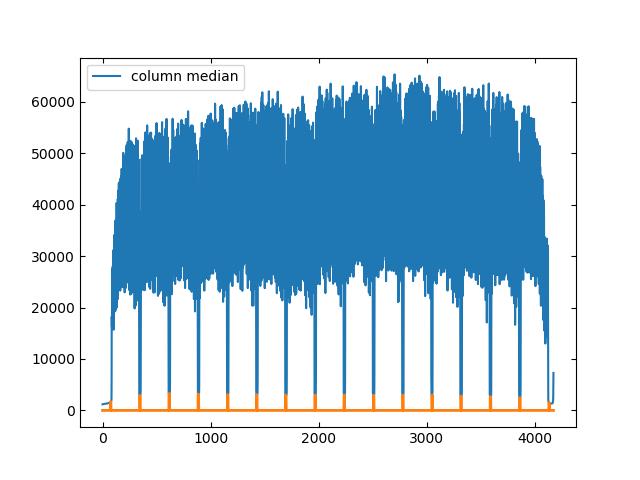

In [6]:
for i, sci in enumerate(name_sci_prob):
    dir_sci = glob.glob("w*/"+sci)[0]
    
    # Moving each science directory
    name_sci = dir_sci.split("/")[-1]
    print("Moving path for "+name_sci+"...")
    os.chdir(current_dir+"/"+dir_sci)
    iraf.chdir(current_dir+"/"+dir_sci)    

    # FLAT
    flat = np.loadtxt(ic.lst_flat, dtype=str)
    flat0 = flat.item(0)

    # Reading FITS images
    flat_name = 'rg'+flat0+'.fits'
    rg = fits.getdata(flat_name, ext=1)
    
    # Defining the gaps with upper limit
    column_median = np.median(rg, axis=1)
    gaps = (column_median < gap_upper_limit)
    jmsk = np.zeros_like(column_median)
    jmsk[~gaps] = np.nan
    jmsk[gaps] = column_median[gaps]
    
    # Indices of the gaps
    gap_width = 270    # a roughly measured gap width
    idx_jmsk = np.arange(len(jmsk))[np.isnan(jmsk) == False]
    div_jmsk = idx_jmsk // gap_width
    
    # Arranging new gaps
    gap_half = 2    # Half width of the gap
    idx_ngap = np.zeros((len(np.unique(div_jmsk)), 2), dtype='int')    # Indices of newly defined gaps
    for j, i_div in enumerate(np.unique(div_jmsk)):
        if ((j != 0) & (j != len(np.unique(div_jmsk))-1)):
            idx = idx_jmsk[div_jmsk == i_div]
            idx_min = idx[jmsk[idx] == np.min(jmsk[idx])]
            idx_ngap[j] = (int(idx_min-gap_half), int(idx_min+gap_half))
    gap_width2 = int(np.median(np.diff(idx_ngap[:, 0])[1:-1]))
    idx_ngap[0] = (int(idx_ngap[1][0]-gap_width2), int(idx_ngap[1][1]-gap_width2))
    idx_ngap[-1] = (int(idx_ngap[-2][0]+gap_width2), int(idx_ngap[-2][1]+gap_width2))        
    print(idx_ngap)

    # Checkplots
    fig, ax = plt.subplots()
    ax.plot(np.median(rg, axis=1), label='column median')
    jmsk[:] = 0.
    for idx in idx_ngap:
        jmsk[idx[0]:idx[1]+1] = column_median[idx[0]:idx[1]+1]
    ax.plot(jmsk, linewidth=2.0, color='C1', zorder=+10)
    plt.legend()

    # Writing
    blkmsk_name = 'newblkmask_'+flat0
    f = open(blkmsk_name, 'w')
    for idx in idx_ngap:
        f.write('1 '+str(rg.shape[1])+' '+str(idx[0])+' '+str(idx[1])+'\n')
    f.close()
    
    # Coming back to current path
    os.chdir(current_dir)
    iraf.chdir(current_dir)